# SVM for classification

Load IRIS dataset, check its contents:


In [2]:
import pd
from PIL.ImageColor import colormap
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [4]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [5]:
# first we need to determine only first two feature columns , but I think first two columns are related with each other and automatically between each other have linearly relations
X = iris.data[:, :2]  #

# Check dimension X
print("Dimensions:", X.shape)
print("First five rows:")
print(X[:5])


Dimensions: (150, 2)
First five rows:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


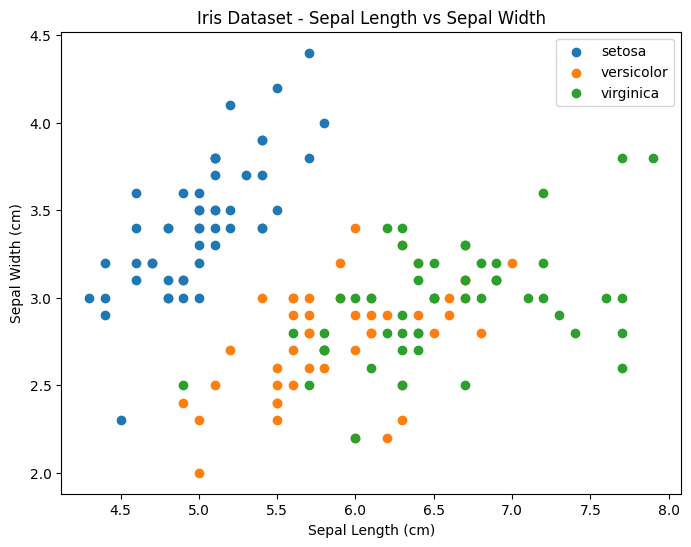

In [6]:
import matplotlib.pyplot as plt

# we add date on the graph
X_full = iris.data[:, :2]
y_full = iris.target       #

# Draw scatter plot
plt.figure(figsize=(8, 6))

# we show different color for each target
for i, label in enumerate(iris.target_names):
    plt.scatter(X_full[y_full == i, 0], X_full[y_full == i, 1], label=label)

# Grafik başlık ve etiketler
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset - Sepal Length vs Sepal Width")
plt.legend()
plt.show()


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

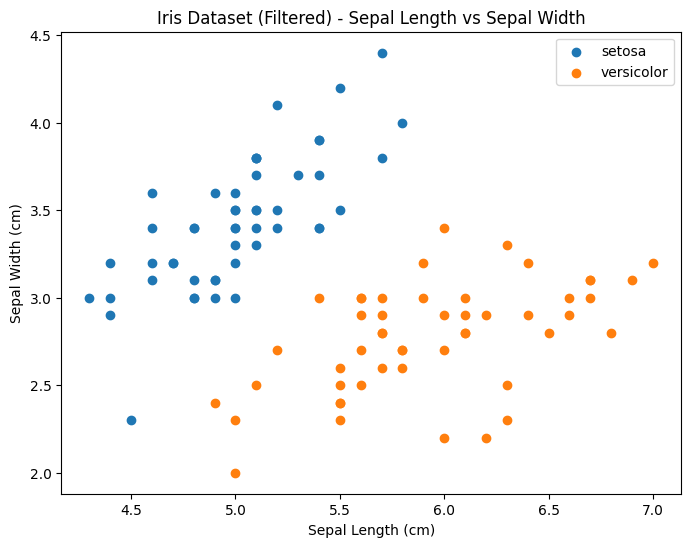

In [7]:
#We see that 1 and 2 are coincide each other, so we remove number 2
#We apply same method we choice graph dimensions as you wish
X_full = iris.data[:, :2]
y_full = iris.target
plt.figure(figsize=(8, 6))

for i, label in enumerate(iris.target_names[:2]):  # İlk iki sınıfı al
    plt.scatter(X[y_full == i, 0], X[y_full == i, 1], label=label)

# title and legends
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset (Filtered) - Sepal Length vs Sepal Width")
plt.legend()
plt.show()


Calculating Accuracy

In [8]:
#We need do define without type 2 in the data and I want to define different method from before one.
mask = iris.target != 2
X = X[mask]
y = iris.target[mask]
# Let's seperate the data into traning and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Let's apply SVC method with linear kernel
svm_model = SVC(kernel="linear", C=200, random_state=42)
# Now,Let's train the model
svm_model.fit(X_train, y_train)

# We make model predict
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")


SVM Model Accuracy: 1.00


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [9]:
#İf we try to write different C values accuracy may be change
#Let's we see
import pandas as pd
C_values = [0.01, 0.1, 1.0, 10, 200]  # Küçükten büyüğe farklı C değerleri

results = {}

for C in C_values:
    # same, we create svm method with linear kernel
    svm_model = SVC(kernel="linear", C=C, random_state=42)

    # Train model
    svm_model.fit(X_train, y_train)

    # make prediction with test data
    y_pred = svm_model.predict(X_test)

    # calculate accuracy with different C value
    accuracy = accuracy_score(y_test, y_pred)

    # save the results
    results[C] = accuracy
    df_results = pd.DataFrame(list(results.items()), columns=["C Value", "Accuracy"])
print(df_results)
#We see that C value at the beginning change accuracy significantly but after some values, accuracies are same

   C Value  Accuracy
0     0.01       0.4
1     0.10       1.0
2     1.00       1.0
3    10.00       1.0
4   200.00       1.0


Plot scatter and adding decision boundry line & Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:


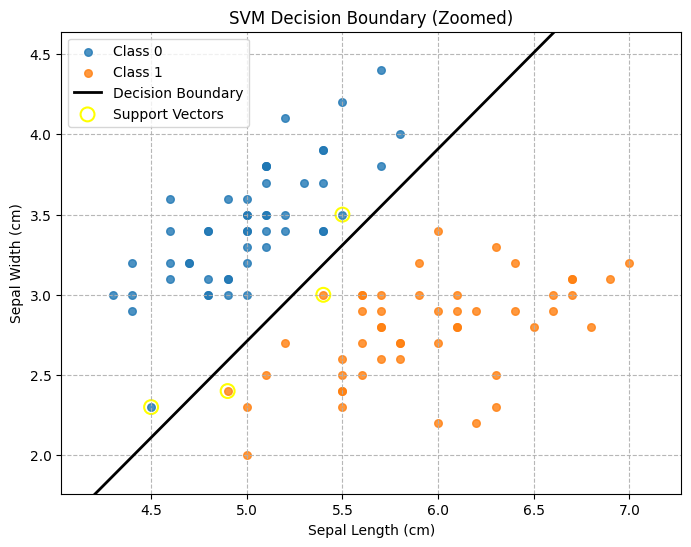

In [10]:
import numpy as np

sup_vectors = svm_model.support_vectors_
def plot_decision_boundary_zoomed(X, y, model, zoom_factor=0.8):
    plt.figure(figsize=(8, 6))

    # I plot the data with specifik opacity (alpha) and size (s)
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}", s=30, alpha=0.8)

    # Let's determine some important values for drawing decision boundary because (w_0)*(x_0) + (w_1)*(x_1) + b = 0
    w = model.coef_[0]  # weight vector
    b = model.intercept_[0]  # Bias (constant coefficient )

    # x ekseni için aralık belirleyelim
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    # Let's narrow down the scale to zoom in
    x_margin = (x_max - x_min) * (1 - zoom_factor) / 2
    y_margin = (y_max - y_min) * (1 - zoom_factor) / 2

    x_vals = np.linspace(x_min - x_margin, x_max + x_margin, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]

    # draw decision boundary line
    plt.plot(x_vals, y_vals, 'k-', linewidth=2, label="Decision Boundary")
    plt.scatter(sup_vectors[:, 0], sup_vectors[:, 1],
            s=100, facecolors='none', edgecolors='yellow', linewidths=1.5, label="Support Vectors")

    # I determine the axis for good view
    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)

    # axis names and plot title
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Sepal Width (cm)")
    plt.title("SVM Decision Boundary (Zoomed)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.9)  # Hafif grid ekleyelim
    plt.show()

#  I want to make model which having different perspective, so I add zoom_factor into function and you can adjust it according to what scaling you want.
plot_decision_boundary_zoomed(X, y, svm_model, zoom_factor=0.8)


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

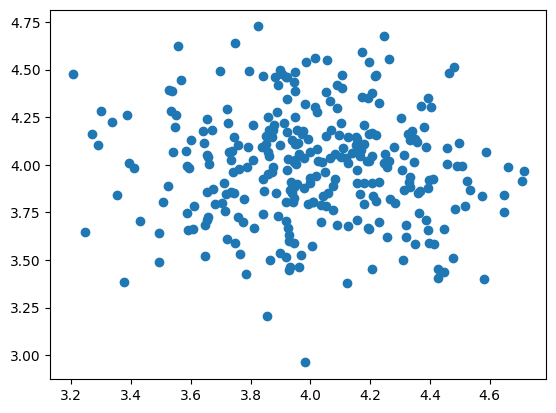

In [11]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

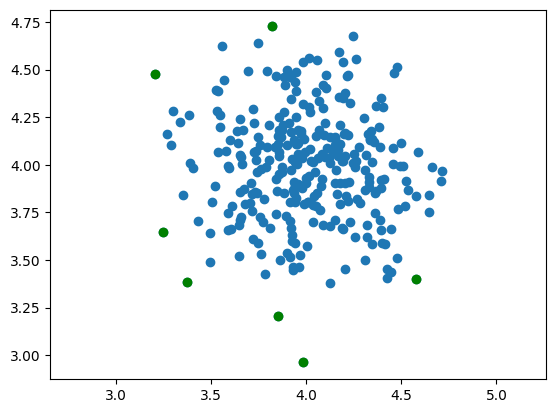

In [12]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]


plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='green')
plt.axis('equal')
plt.show()



Plot the support vectors:

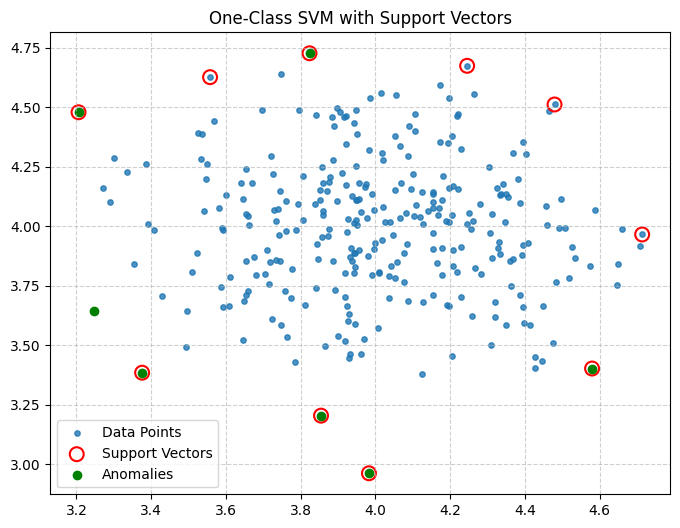

In [13]:
support_vectors = SVMmodelOne.support_vectors_
plt.figure(figsize=(8, 6))

# draw all data points
plt.scatter(x[:, 0], x[:, 1], label="Data Points", s=15, alpha=0.8)

# I draw support vector with red color
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='red', linewidths=1.5, label="Support Vectors")

# I show anomalies with green color
plt.scatter(values[:, 0], values[:, 1], color='green', label="Anomalies")

#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")
plt.title("One-Class SVM with Support Vectors")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


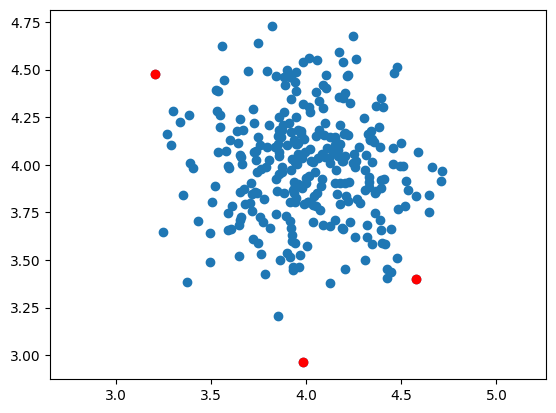

In [94]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()